# Customer Journey

## Import Required Packages

In [44]:
import pandas as pd
import numpy as np

## Read Data (Product Specific)

In [45]:
events = pd.read_csv('event2.csv')
events

,updated_date,event_name,creation_date,completed_at,total_discounts,order_number,id,processing_method,total_price,user_id,...,gateway,abandoned_checkout_url,intercom_user_id,email,product_id,product_title,product_price,product_status,product_grams,product_sku
0,1512697908,checkout-customer-infos-step,1512697870,NaN,NaN,#212626636819,212627000000,NaN,8800,4.39866e+09,...,NaN,https://checkout.shopify.com/14402440/checkout...,5a2233b89bdbb3db0c165793,customer849@email.com,9386653255,Resist Skin Resurfacing + Smoothing Exfoliant Kit,8800,NaN,NaN,4850
1,1512697942,checkout-payment-step,1512697870,NaN,NaN,#212626636819,212627000000,NaN,8800,4.39866e+09,...,NaN,https://checkout.shopify.com/14402440/checkout...,5a2233b89bdbb3db0c165793,customer849@email.com,9386653255,Resist Skin Resurfacing + Smoothing Exfoliant Kit,8800,NaN,NaN,4850
2,1512697983,order-paid,1512697983,NaN,NaN,191569912821,89274286099,direct,8800,4.39866e+09,...,stripe,NaN,5a2233b89bdbb3db0c165793,customer849@email.com,9386653255,Resist Skin Resurfacing + Smoothing Exfoliant Kit,8800,NaN,NaN,4850
3,1512697983,checkout-completed,1512697870,1.512698e+09,NaN,#212626636819,212627000000,NaN,8800,4.39866e+09,...,stripe,https://checkout.shopify.com/14402440/checkout...,5a2233b89bdbb3db0c165793,customer849@email.com,9386653255,Resist Skin Resurfacing + Smoothing Exfoliant Kit,8800,NaN,NaN,4850
4,1512697988,order-create,1512697983,NaN,NaN,191569912821,89274286099,direct,8800,4.39866e+09,...,stripe,NaN,5a2233b89bdbb3db0c165793,customer849@email.com,9386653255,Resist Skin Resurfacing + Smoothing Exfoliant Kit,8800,NaN,NaN,4850
5,1512707862,checkout-customer-infos-step,1512707844,NaN,NaN,#213026832403,213027000000,NaN,8600,4.39856e+09,...,NaN,https://checkout.shopify.com/14402440/checkout...,5a2a171a6fe23bd05f9e31ed,customer1377@email.com,8561792135,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,4300,NaN,158,2010
6,1512707991,checkout-customer-infos-step,1512707844,NaN,NaN,#213026832403,213027000000,NaN,8600,4.39856e+09,...,external-credit,https://checkout.shopify.com/14402440/checkout...,5a2a171a6fe23bd05f9e31ed,customer1377@email.com,8561792135,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,4300,NaN,158,2010
7,1512707993,order-fulfilled,1512707993,NaN,NaN,191569912823,89458769939,external-credit,8600,4.39856e+09,...,external-credit,NaN,5a2a171a6fe23bd05f9e31ed,customer1377@email.com,8561792135,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,4300,fulfilled,158,2010
8,1512707993,order-paid,1512707993,NaN,NaN,191569912823,89458769939,external-credit,8600,4.39856e+09,...,external-credit,NaN,5a2a171a6fe23bd05f9e31ed,customer1377@email.com,8561792135,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,4300,NaN,158,2010
9,1512707993,order-create,1512707993,NaN,NaN,191569912823,89458769939,external-credit,8600,4.39856e+09,...,external-credit,NaN,5a2a171a6fe23bd05f9e31ed,customer1377@email.com,8561792135,Skin Perfecting 2% BHA (Salicylic Acid) Liquid...,4300,NaN,158,2010


## Get Order Specific Data

In [46]:
orders = events.copy()
drop_columns = ['product_title','product_id','product_price','product_status','product_grams','product_sku']
orders = orders.drop(drop_columns, axis=1)
print(orders.shape)
orders = orders.drop_duplicates()
print (orders.shape)
orders = orders[pd.notnull(orders['user_id'])]
print (orders.shape)
orders.to_csv('temp.csv')

(37726, 15)
(16956, 15)
(16946, 15)


## Add Back Discount (check out price change even if same order)

In [47]:
import ast
def add_back_discount(row):
    if not pd.isnull(row['total_discounts']):
        row['total_price'] = float(float(row['total_price']) + float(ast.literal_eval(row['total_discounts'])['amount']))
    return row
orders = orders.apply(add_back_discount,axis=1)
orders.to_csv('temp2.csv')

## Sort Orders

In [48]:
orders = orders.sort_values(['user_id', 'created_at'], ascending=[True, True])
orders.to_csv('cleaned_events.csv')

## Impute Total Price

In [49]:
previous_price = 0
def impute_total_price(val):
    global previous_price
    if pd.isnull(val):
        return previous_price
    else:
        previous_price = val
        return val

orders["total_price"] = orders["total_price"][::-1].apply(lambda x: impute_total_price(x))
orders["total_price"] = orders["total_price"][::-1]
orders

,updated_date,event_name,creation_date,completed_at,total_discounts,order_number,id,processing_method,total_price,user_id,created_at,gateway,abandoned_checkout_url,intercom_user_id,email
20921,1517020064,create-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020064,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20922,1517020065,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020065,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20923,1517020149,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020149,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20925,1517020474,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020474,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21199,1517033172,checkout-start,1517033172,NaN,NaN,#524617154579,524617000000,NaN,23100,4.39846e+09,1517033172,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21202,1517033172,checkout-customer-infos-step,1517033172,NaN,NaN,#524617154579,524617000000,NaN,23100,4.39846e+09,1517033172,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21205,1517033195,checkout-payment-step,1517033172,NaN,NaN,#524617154579,524617000000,NaN,23100,4.39846e+09,1517033195,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21596,1517066945,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517066945,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21608,1517067225,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517067225,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21611,1517067316,update-cart,1517020064,NaN,NaN,NaN,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517067316,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com


## Impute Order number

In [50]:
def remove_order_num_with_no_hash(id):
    if not str(id).isdigit():
        return ""
    else:
        return id
    
previous_id = 0
def impute_order_id(id):
    global previous_id
    if id:
        previous_id = id
        return id
    else:
        return previous_id
orders["order_number"] = orders["order_number"].apply(remove_order_num_with_no_hash)
orders["order_number"] = orders["order_number"][::-1].apply(impute_order_id)
orders["order_number"] = orders["order_number"][::-1]
orders
    

,updated_date,event_name,creation_date,completed_at,total_discounts,order_number,id,processing_method,total_price,user_id,created_at,gateway,abandoned_checkout_url,intercom_user_id,email
20921,1517020064,create-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020064,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20922,1517020065,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020065,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20923,1517020149,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020149,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
20925,1517020474,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,23100,4.39846e+09,1517020474,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21199,1517033172,checkout-start,1517033172,NaN,NaN,191569914330,524617000000,NaN,23100,4.39846e+09,1517033172,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21202,1517033172,checkout-customer-infos-step,1517033172,NaN,NaN,191569914330,524617000000,NaN,23100,4.39846e+09,1517033172,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21205,1517033195,checkout-payment-step,1517033172,NaN,NaN,191569914330,524617000000,NaN,23100,4.39846e+09,1517033195,NaN,https://checkout.shopify.com/14402440/checkout...,59f839e099b81df063b4fad0,customer334@email.com
21596,1517066945,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517066945,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21608,1517067225,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517067225,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com
21611,1517067316,update-cart,1517020064,NaN,NaN,191569914330,4102611f7d07bef8a727f5123c391ed6,NaN,11100,4.39846e+09,1517067316,NaN,NaN,59f839e099b81df063b4fad0,customer334@email.com


In [53]:
orders.to_csv('temp3.csv')

## Analytics on Customer Journey

## Cart Abandon Rate

In [9]:
orders["order_number"] = orders["order_number"].apply(str)

In [59]:
group_by_events = orders['event_name'].groupby(orders['order_number'])
total = 0
cart_change_abandon = 0
cart_change_success = 0
paid = 0
for name, group in group_by_events:
    if 'update-cart' in list(group) or 'create-cart' in list(group):
        total += 1
        if 'order-paid' in list(group):
            paid += 1
        
    
print ("Cart Abandon Rate: %f" % (float(total-paid) / total))

Cart Abandon Rate: 0.006510


## Abandoned Cart Come Back and Buy

In [62]:
group_by_events = orders[['event_name','order_number']].groupby([orders['user_id']])
abandon_customer = 0
abandon_return_customer = 0
for name, group in group_by_events:
    if list(group['event_name']).count('order-paid') == 0:
        abandon_customer += 1
    else:
        if list(group['event_name']).count('order-paid') < len(set(group['order_number'])):
            abandon_customer += 1
            abandon_return_customer += 1
print ("Abandon and Return Rate: %f" % (float(abandon_return_customer) / abandon_customer))        
                                                

Abandon and Return Rate: 0.400576


## Abandon Reason

In [61]:
group_by_events = orders['event_name'].groupby(orders['order_number'])
checkout_completed = 0
checkout_customer_infos_step = 0
checkout_payment_step = 0
cart_step = 0
abandon_order = 0
for name, group in group_by_events:
    if 'order-paid' not in list(group) and ('create-cart' in list(group) or 'update-cart' in list(group)):
        abandon_order += 1
        if 'checkout-completed' in list(group):
            checkout_completed += 1
        elif 'checkout-payment-step' in list(group):
            checkout_customer_infos_step += 1
        elif 'checkout-customer-infos-step' in list(group):
            checkout_payment_step += 1
        elif 'update-cart' in list(group) or 'create-cart' in list(group):
            cart_step += 1
print ("Stop at checkout-completed: %f" % (float(checkout_completed) / abandon_order))
print ("Stop at checkout-customer-infos-step: %f" % (float(checkout_customer_infos_step) / abandon_order))
print ("Stop at checkout-payment-step: %f" % (float(checkout_payment_step) / abandon_order))
print ("Stop at cart-step: %f" %(float(cart_step) / abandon_order))

Stop at checkout-completed: 0.600000
Stop at checkout-customer-infos-step: 0.200000
Stop at checkout-payment-step: 0.200000
Stop at cart-step: 0.000000


## Overall First Time and Returning Customer 

In [63]:
group_by_events = orders[['event_name','order_number']].groupby([orders['user_id']])
first_time = 0
recurring = 0
first_time_buy = 0
recurring_buy = 0
total = 0
for name, group in group_by_events:
    total += 1
    if len(set(group['order_number'])) == 1:
        if 'order-paid' in list(group['event_name']):
            first_time_buy += 1
        else:
            first_time += 1
    else:
        if 'order-paid' in list(group['event_name']):
            recurring_buy += 1
        else:
            recurring += 1
print("First Time Customer (Buy)： %f" % (float(first_time_buy) / total))
print("First Time Customer (No Buy)： %f" % (float(first_time) / total))
print("Recurring Customer (Buy)： %f" % (float(recurring_buy) / total))
print("Recurring Customer (No Buy)： %f" % (float(recurring) / total))
        

First Time Customer (Buy)： 0.669053
First Time Customer (No Buy)： 0.112885
Recurring Customer (Buy)： 0.216410
Recurring Customer (No Buy)： 0.001652


## Check Customer Info First Time and Returning Customer

In [14]:
group_by_events = orders[['event_name','order_number']].groupby([orders['user_id']])
first_time = 0
recurring = 0
first_time_buy = 0
recurring_buy = 0
total = 0
for name, group in group_by_events:
    total += 1
    if len(set(group['order_number'])) == 1:
        if 'checkout-customer-infos-step' in list(group['event_name']):
            if 'order-paid' in list(group['event_name']):
                first_time_buy += 1
            else:
                first_time += 1
    else:
        if list(group['event_name']).count('checkout-customer-infos-step') > list(group['event_name']).count('order-paid'):
            recurring_buy += 1
        if 'order-paid' not in list(group['event_name']):
            recurring += 1
print("First Time Customer (Buy)： %f" % (float(first_time_buy) / total))
print("First Time Customer (No Buy)： %f" % (float(first_time) / total))
print("Recurring Customer (Buy)： %f" % (float(recurring_buy) / total))
print("Recurring Customer (No Buy)： %f" % (float(recurring) / total))

First Time Customer (Buy)： 0.507709
First Time Customer (No Buy)： 0.074339
Recurring Customer (Buy)： 0.138767
Recurring Customer (No Buy)： 0.001652


## Check Completed First Time and Returning Customer

In [15]:
group_by_events = orders[['event_name','order_number']].groupby([orders['user_id']])
first_time = 0
recurring = 0
first_time_buy = 0
recurring_buy = 0
total = 0
for name, group in group_by_events:
    total += 1
    if len(set(group['order_number'])) == 1:
        if 'checkout-completed' in list(group['event_name']):
            if 'order-paid' in list(group['event_name']):
                first_time_buy += 1
            else:
                first_time += 1
    else:
        if list(group['event_name']).count('checkout-completed') > list(group['event_name']).count('order-paid'):
            recurring_buy += 1
        if 'order-paid' not in list(group['event_name']):
            recurring += 1
print("First Time Customer (Buy)： %f" % (float(first_time_buy) / total))
print("First Time Customer (No Buy)： %f" % (float(first_time) / total))
print("Recurring Customer (Buy)： %f" % (float(recurring_buy) / total))
print("Recurring Customer (No Buy)： %f" % (float(recurring) / total))

First Time Customer (Buy)： 0.535793
First Time Customer (No Buy)： 0.003855
Recurring Customer (Buy)： 0.013216
Recurring Customer (No Buy)： 0.001652


## Time Analysis on Steps

In [64]:
orders['updated_date'] = orders['updated_date'].apply(int)
group_by_events = orders[['event_name','updated_date']].groupby([orders['user_id'], orders['order_number']])
dataframe = []
for name, group in group_by_events:
    max_time = 0
    max_event = ""
    for i in range(1,len(group)):
        time = group['updated_date'].iloc[i] - group['updated_date'].iloc[i-1]
        if time < 3600 and time > max_time and group['event_name'].iloc[i] != 'create-cart' and group['event_name'].iloc[i] != 'order-fulfilled' and group['event_name'].iloc[i-1] != 'order-fulfilled' and group['event_name'].iloc[i-1] != 'order-paid':
            max_time = time
            max_event = "%s to %s" %(group['event_name'].iloc[i-1], group['event_name'].iloc[i])
    if max_time > 0:
        dataframe.append([max_event, max_time])
time_frame = pd.DataFrame(dataframe, columns = ['event', 'time'])
time_frame.head()

,event,time
0,update-cart to checkout-payment-step,537
1,checkout-start to checkout-customer-infos-step,9
2,checkout-payment-step to checkout-completed,174
3,update-cart to checkout-start,763
4,update-cart to update-cart,127


In [66]:
group_by_events = time_frame['time'].groupby([time_frame['event']])
steps_time_data = []
for name, group in group_by_events:
    steps_time_data.append([name, group.mean()])

steps_time_data = pd.DataFrame(steps_time_data, columns=['event', 'time'])
steps_time_data = steps_time_data.sort_values(by='time', ascending=False)
print steps_time_data

                                                event         time
26                     order-create to checkout-start  1015.500000
12  checkout-payment-step to checkout-customer-inf...   860.600000
17               checkout-payment-step to update-cart   771.960000
14            checkout-payment-step to checkout-start   748.000000
10        checkout-customer-infos-step to update-cart   708.731707
35                         update-cart to update-cart   609.478049
13     checkout-payment-step to checkout-payment-step   521.245283
19            checkout-start to checkout-payment-step   468.111111
30        update-cart to checkout-customer-infos-step   448.750000
22                      create-cart to checkout-start   432.363636
20                      checkout-start to update-cart   425.200000
32                      update-cart to checkout-start   421.000000
31               update-cart to checkout-payment-step   403.722222
34                          update-cart to order-paid   381.00

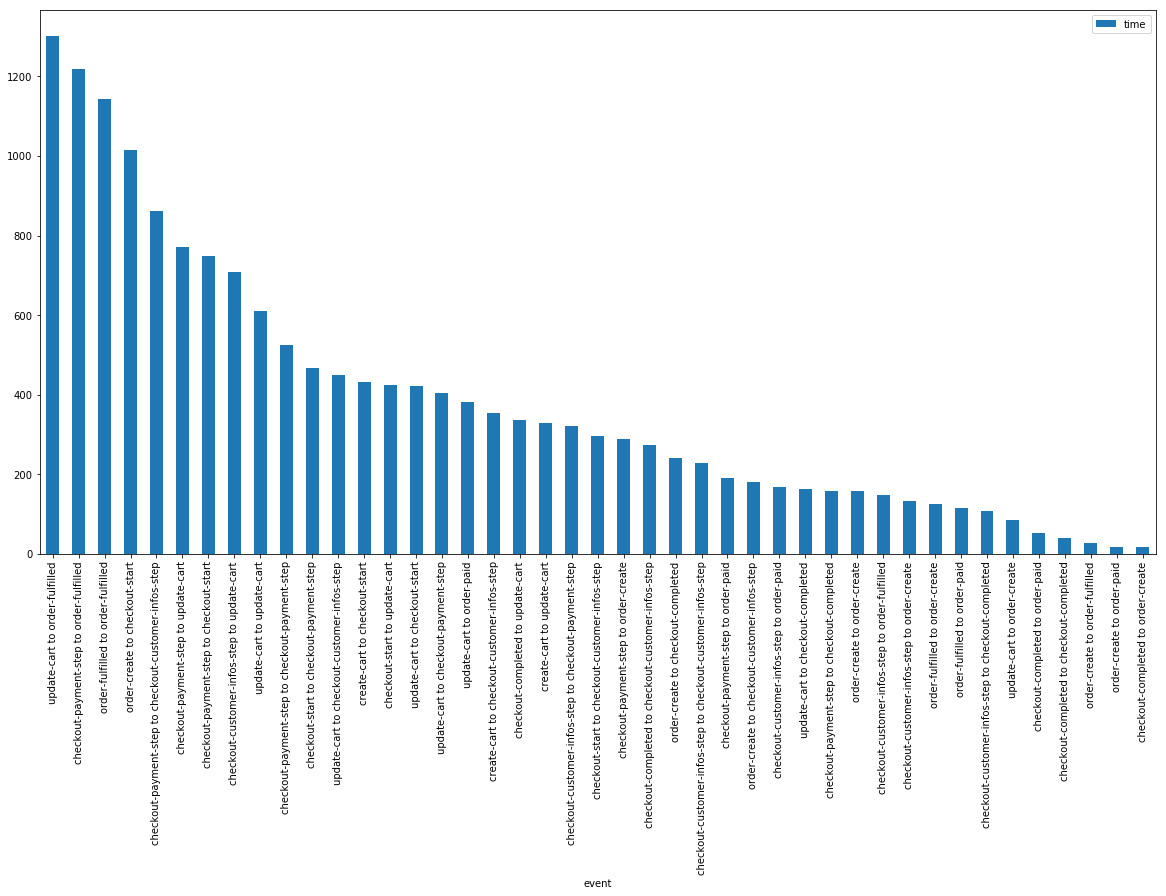

In [35]:
import matplotlib.pyplot as plt
steps_time_data.plot(x='event', y='time', kind='bar', figsize=(20,10))
plt.show()

## Time Analysis on orders

In [32]:
orders['updated_date'] = orders['updated_date'].apply(int)
group_by_events = orders[['event_name','updated_date']].groupby([orders['user_id'], orders['order_number']])
paid = 0
unpaid = 0
total_time_paid = 0
paid_time_list = []
unpaid_time_list = []
total_time_unpaid = 0
for name, group in group_by_events:
    if 'order-paid' in list(group['event_name']):
        total_time_paid += group['updated_date'].iloc[-1] - group['updated_date'].iloc[0]
        paid += 1
        paid_time_list.append(group['updated_date'].iloc[-1] - group['updated_date'].iloc[0])
    else:
        total_time_unpaid += group['updated_date'].iloc[-1] - group['updated_date'].iloc[0]
        unpaid += 1
        unpaid_time_list.append(group['updated_date'].iloc[-1] - group['updated_date'].iloc[0])

print("Average time spent on a order for paid order: %f" % (float(total_time_paid) / paid))
print("Average time spent on a order for unpaid order: %f" % (float(total_time_unpaid) / unpaid))
print("Average time spent on a order for all order: %f" % (float(total_time_paid + total_time_unpaid) / (unpaid + paid)))

Average time spent on a order for paid order: 252797.033333
Average time spent on a order for unpaid order: 161478.562327
Average time spent on a order for all order: 238715.030756


In [33]:
paid_time_list = pd.Series(paid_time_list)
unpaid_time_list = pd.Series(unpaid_time_list)

In [36]:
import matplotlib.pyplot as plt
print(paid_time_list).mean()
print(paid_time_list.median())
print(unpaid_time_list.mean())
print(unpaid_time_list.median())

252797.033333
63538.5
161478.562327
0.0


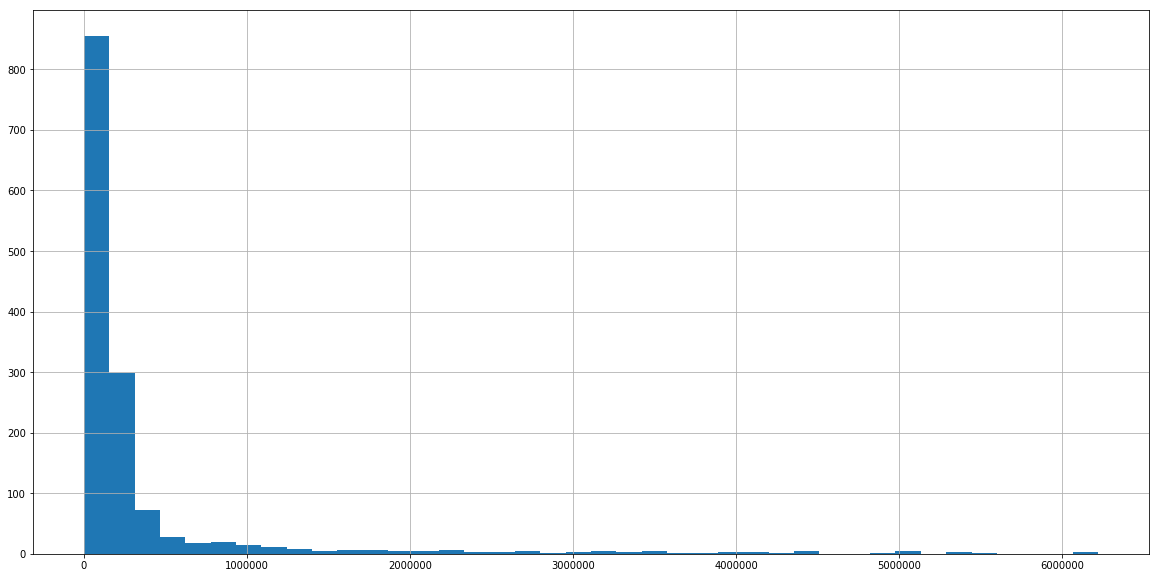

In [54]:
paid_time_list = paid_time_list[paid_time_list > 120]
paid_time_list.hist(figsize=(20,10), bins=40)
plt.show()

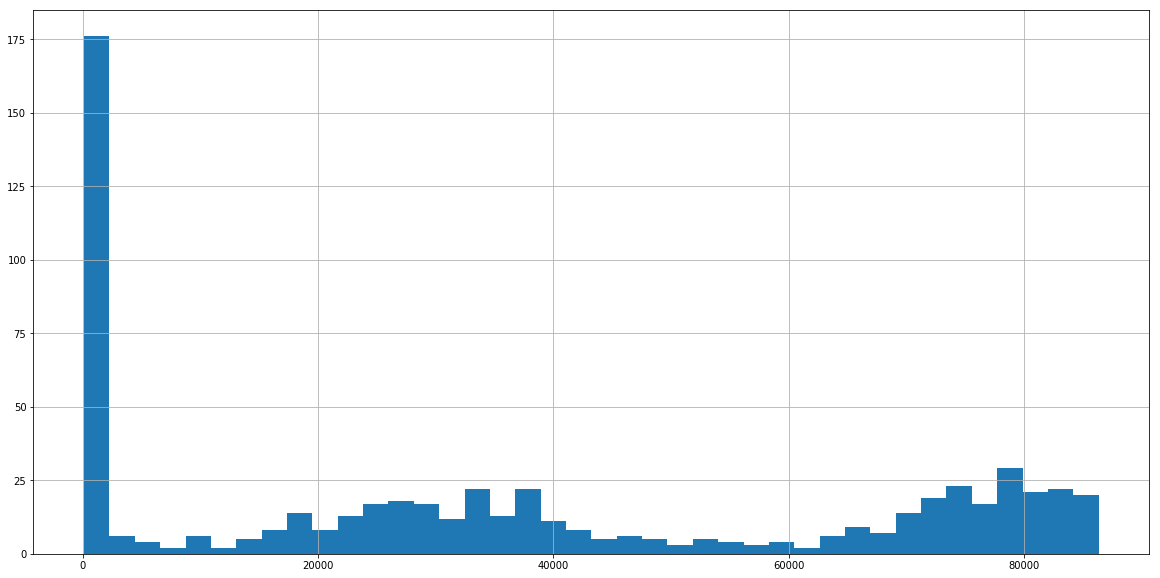

In [55]:
paid_time_list[paid_time_list < 86400].hist(figsize=(20,10), bins=40)
plt.show()

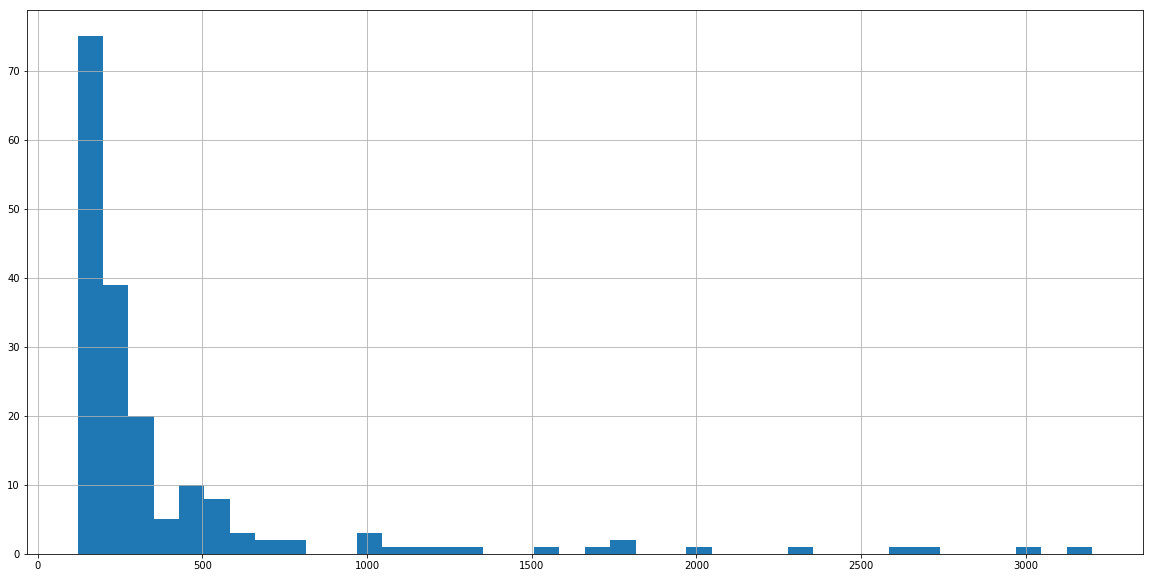

In [56]:
paid_time_list[paid_time_list < 3600].hist(figsize=(20,10), bins=40)
plt.show()

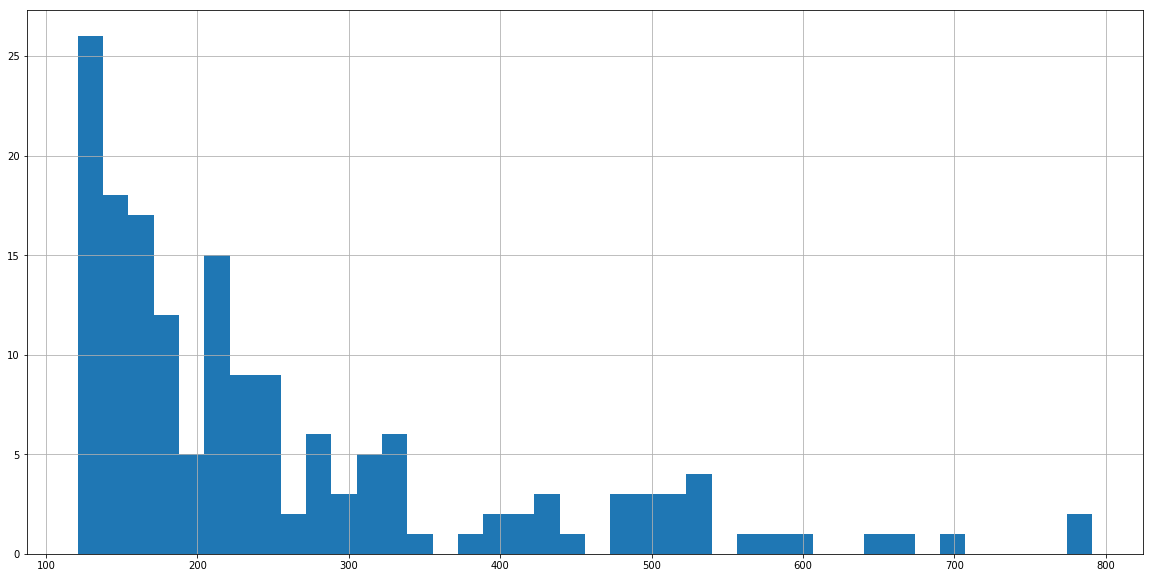

In [57]:
paid_time_list[paid_time_list < 900].hist(figsize=(20,10), bins=40)
plt.show()

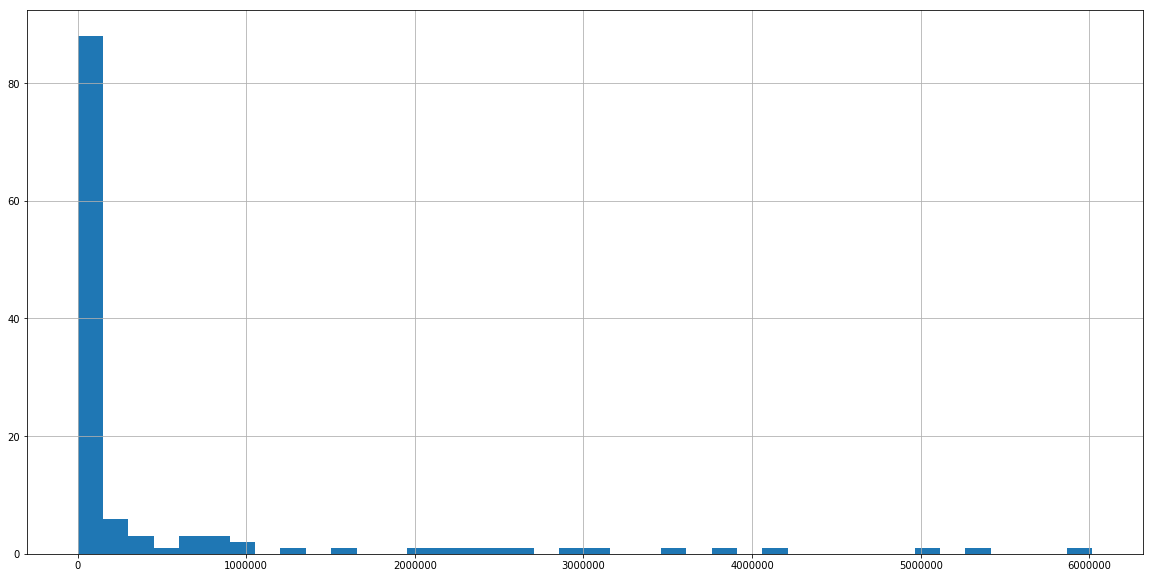

In [60]:
unpaid_time_list = unpaid_time_list[unpaid_time_list > 60]
unpaid_time_list.hist(figsize=(20,10), bins=40)
plt.show()

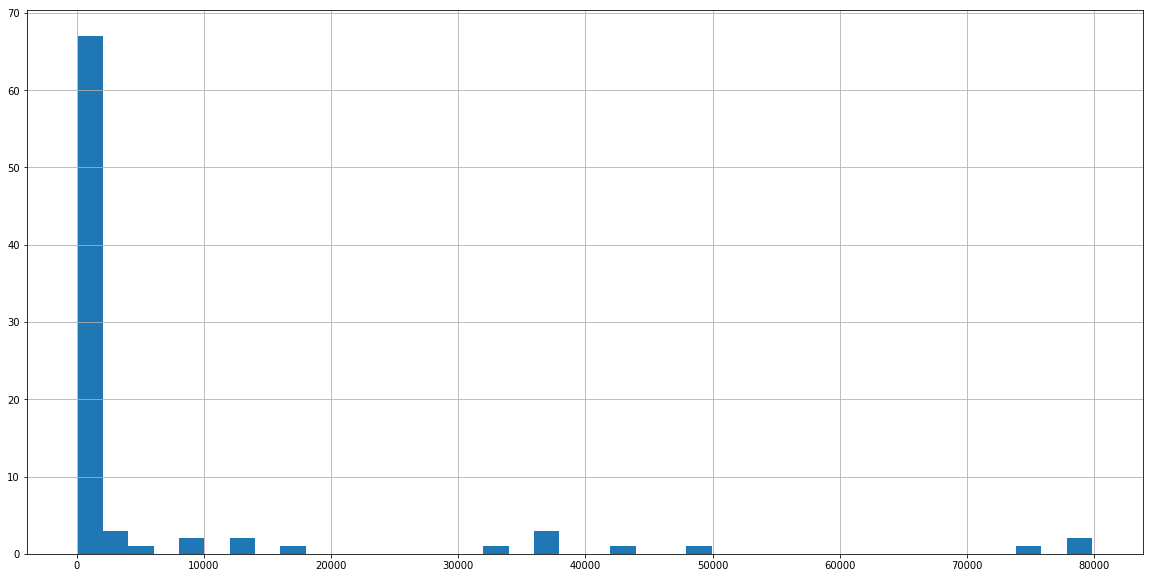

In [62]:
unpaid_time_list[unpaid_time_list < 86400].hist(figsize=(20,10), bins=40)
plt.show()

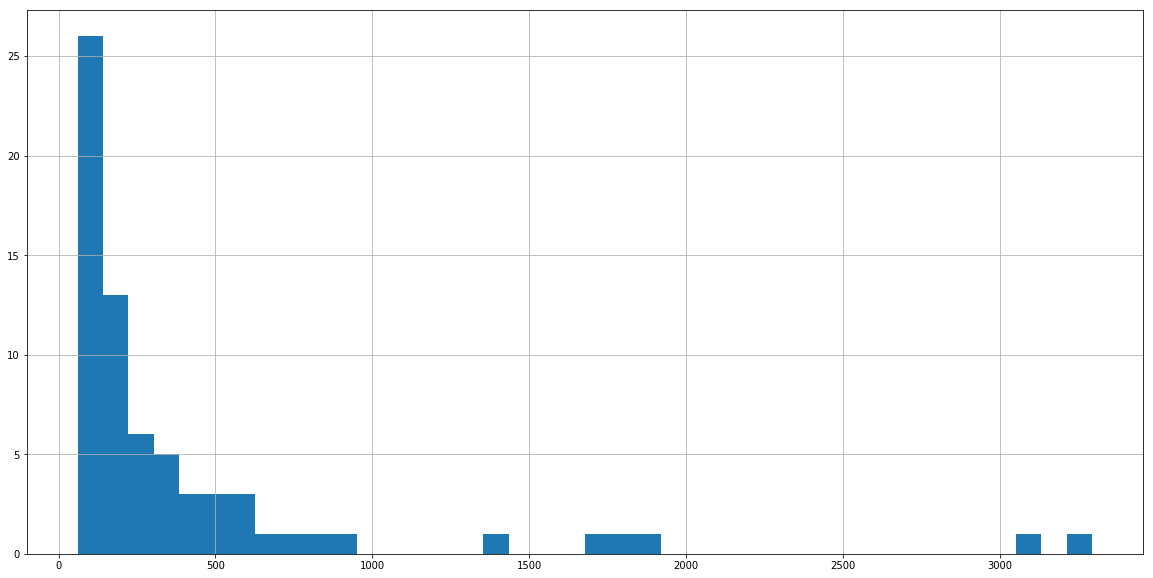

In [63]:
unpaid_time_list[unpaid_time_list < 3600].hist(figsize=(20,10), bins=40)
plt.show()

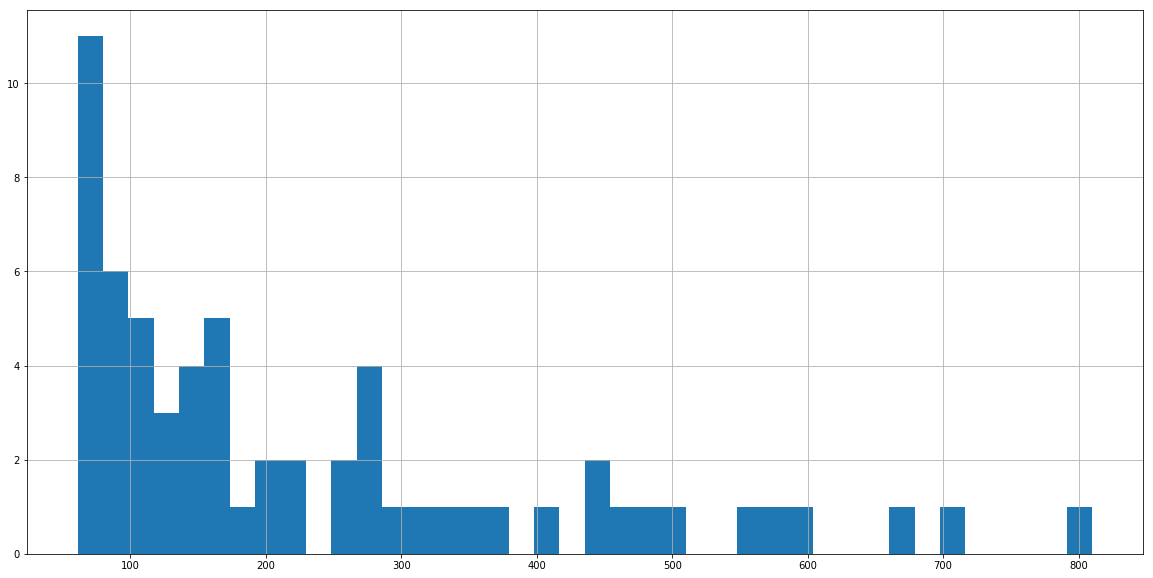

In [64]:
unpaid_time_list[unpaid_time_list < 900].hist(figsize=(20,10), bins=40)
plt.show()